# TITANIC SURVIVAL PREDICTION

# Data Preprocessing

   ### Step 1: Importing required Libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

   ### Step 2: Loading & Exploring the data

In [61]:
# Load the dataset
ds = pd.read_csv("Titanic-Dataset.csv")

ds = ds.drop(['Name'], axis=1)
ds = ds.drop(['Ticket'], axis=1)
ds = ds.drop(['Cabin'], axis=1)

# Explore the dataset
print(ds.head())  # View the first few rows

# Get information about data types and missing values
print(ds.info())
print(ds.isnull().sum())

print(ds.describe())  # Get descriptive statistics
ds.shape # Display the number of row and column

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    male  22.0      1      0   7.2500        S
1            2         1       1  female  38.0      1      0  71.2833        C
2            3         1       3  female  26.0      0      0   7.9250        S
3            4         1       1  female  35.0      1      0  53.1000        S
4            5         0       3    male  35.0      0      0   8.0500        S
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8

(891, 9)

#### There are 2 columns with missing values which are Age and Cabin. Age is an important feature for our dataset so we can't drop it, but Cabin can't affect the analysis of the datasets. So I've removed the column called Cabin and then removed the missing values in Age.

### Step 3: Handle missing values

In [62]:
ds["Age"].fillna(ds["Age"].mean(), inplace=True)  # Fill missing ages with mean
ds.dropna(inplace=True)  # Drop rows with missing values in other columns

print(ds)

     PassengerId  Survived  Pclass     Sex        Age  SibSp  Parch     Fare  \
0              1         0       3    male  22.000000      1      0   7.2500   
1              2         1       1  female  38.000000      1      0  71.2833   
2              3         1       3  female  26.000000      0      0   7.9250   
3              4         1       1  female  35.000000      1      0  53.1000   
4              5         0       3    male  35.000000      0      0   8.0500   
..           ...       ...     ...     ...        ...    ...    ...      ...   
886          887         0       2    male  27.000000      0      0  13.0000   
887          888         1       1  female  19.000000      0      0  30.0000   
888          889         0       3  female  29.699118      1      2  23.4500   
889          890         1       1    male  26.000000      0      0  30.0000   
890          891         0       3    male  32.000000      0      0   7.7500   

    Embarked  
0          S  
1        

#### I have filled the missing values in age with the mean and removed the missing values in Cabin

### Step 4: Feature Engineering

In [63]:
ds["FamilySize"] = ds["SibSp"] + ds["Parch"] + 1  # Creating a new feature/column called family size
ds["IsAlone"] = ds["FamilySize"] == 1  # Creating a feature indicating if passenger is traveling alone

# Convert categorical features to numerical
ds["Sex"] = ds["Sex"].map({"male": 0, "female": 1})
ds["Embarked"] = ds["Embarked"].map({"S": 0, "C": 1, "Q": 2})

print(ds)

# Split the data into features (X) and target variable (y)
X = ds.drop("Survived", axis=1)
y = ds["Survived"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print(X)

     PassengerId  Survived  Pclass  Sex        Age  SibSp  Parch     Fare  \
0              1         0       3    0  22.000000      1      0   7.2500   
1              2         1       1    1  38.000000      1      0  71.2833   
2              3         1       3    1  26.000000      0      0   7.9250   
3              4         1       1    1  35.000000      1      0  53.1000   
4              5         0       3    0  35.000000      0      0   8.0500   
..           ...       ...     ...  ...        ...    ...    ...      ...   
886          887         0       2    0  27.000000      0      0  13.0000   
887          888         1       1    1  19.000000      0      0  30.0000   
888          889         0       3    1  29.699118      1      2  23.4500   
889          890         1       1    0  26.000000      0      0  30.0000   
890          891         0       3    0  32.000000      0      0   7.7500   

     Embarked  FamilySize  IsAlone  
0           0           2    False  
1

#### I have converted categorical features ("Sex" and "Embarked") into numerical values, split the data into features (X) and target variable (y), and further divided the data into training and testing sets using the scikit-learn library.

# Model Building & Evaluation

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train different models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(),
}

# Train and evaluate each model using cross-validation
for name, model in models.items():
    model.fit(X_train, y_train)# Fit the model before cross-validation (crucial step!)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    mean_score = scores.mean()
    print(f"{name}: Mean accuracy: {mean_score:.3f}")
    
# Choose the best-performing model based on cross-validation results
best_model_name, best_model = max(models.items(), key=lambda item: item[1].score(X_train, y_train))

# Hyperparameter tuning for the best model (example with Random Forest)
if best_model_name == "Random Forest":
    param_grid = {
        "n_estimators": [100, 200, 300],
        "max_depth": [5, 8, 10],
    }
    grid_search = GridSearchCV(best_model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

# Train the best model on the full training set
best_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = best_model.predict(X_test)

# Evaluate the model's performance on the testing set
print("\nEvaluation on testing set:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

/root/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/root/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Logistic Regression: Mean accuracy: 0.797
Decision Tree: Mean accuracy: 0.740
Random Forest: Mean accuracy: 0.831
Gradient Boosting: Mean accuracy: 0.826
KNN: Mean accuracy: 0.624

Evaluation on testing set:
Accuracy: 0.7359550561797753
Precision: 0.6410256410256411
Recall: 0.7246376811594203
F1-score: 0.6802721088435374


# Analysis and Interpretation

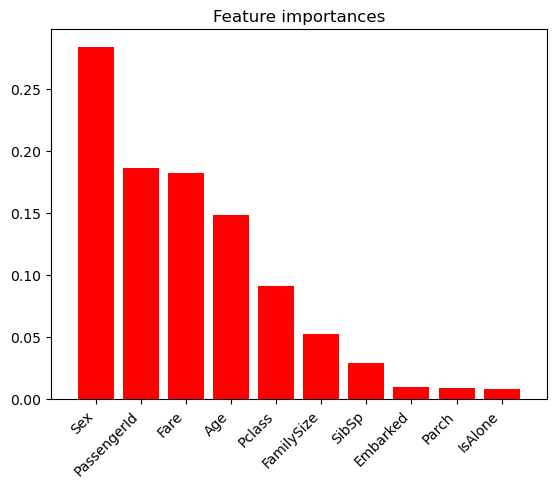

Feature importances:

Sex: 0.2838
PassengerId: 0.1859
Fare: 0.1820
Age: 0.1487
Pclass: 0.0910
FamilySize: 0.0521
SibSp: 0.0294
Embarked: 0.0101
Parch: 0.0086
IsAlone: 0.0083


In [76]:
# Choose the best-performing model based on cross-validation results
best_model_name, best_model = max(models.items(), key=lambda item: item[1].score(X_train, y_train))

# Feature importance analysis (adjusted for DecisionTreeClassifier)
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Plot the feature importances (no need for std calculation as there's a single tree)
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X_test.shape[1]), importances[indices], color="r", align="center")
    plt.xticks(range(X_test.shape[1]), X_test.columns[indices], rotation=45, ha="right")
    plt.xlim([-1, X_test.shape[1]])
    plt.show()

    # Print feature importances in a table
    print("Feature importances:\n")
    for feature, importance in zip(X_test.columns[indices], importances[indices]):
        print(f"{feature}: {importance:.4f}")

else:
    print("Feature importances are not available for the chosen model type.")